#**Diagnosing Bias and Variance using Learning curves**

Author: Mohammed A. Shehab

### Introduction:

In this tutorial, we will learn how to diagnose bias and variance in a machine learning model using learning curves. Bias and variance are two key aspects of a model's performance that can be analyzed using learning curves.



In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import learning_curve
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import make_scorer, f1_score

1.   Loading the Dataset




In [ ]:
# Load the breast cancer dataset
data = load_breast_cancer()
X = data.data
y = data.target

In [ ]:
print(f"the shape of the training set (input) is: {X.shape}")
print(f"the shape of the training set (target) is: {y.shape}\n")

the shape of the training set (input) is: (569, 30)
the shape of the training set (target) is: (569,)



### **Creating a Decision Tree Classifier:**
We will create a decision tree classifier for this tutorial, because we can change the complexity of it

In [ ]:
# Create a decision tree classifier
clf = DecisionTreeClassifier()

For the model evaluation, we use **F1-score**

In [ ]:
# Define the F1 scoring function
scorer = make_scorer(f1_score)

Now, we are engaged in executing the model for the purpose of comparing the learning curve for both training and cross-validation. Correspondingly, we have identified three potential outcomes:

* First, if the space between the training and cross-validation curves is larger and without intersection, the model is deemed to be suffering from high bias.

* Second, if the space between the training and cross-validation curves is smaller and without intersection, even when the data size is increased, the model is deemed to be suffering from high variance.

* Third, if the training and cross-validation curves intersect at a point where the model complexity is optimal, the model is considered to be just-right. This represents the sweet spot where the model neither underfits nor overfits the data.

In [ ]:
# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf, X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=10, scoring=scorer, n_jobs=-1)

In [ ]:
# Calculate the mean and standard deviation of training scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

### Plotting the Learning Curve:
Let's plot the learning curve for the decision tree classifier to visualize the model's performance.

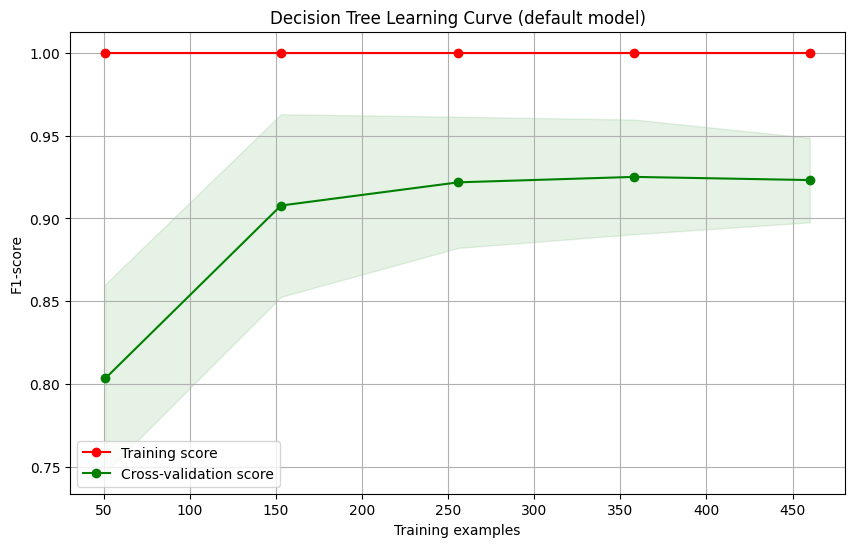

In [ ]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("F1-score")
plt.title("Decision Tree Learning Curve (default model)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

As we can see the space between the training score (*F1-score*) and cross-validaiton is large without intersection. Therefore, the model has a **high variance issue**. In other words, it is too complex and we need to simpler one.

* **Note**: The max_depth parameter in the default model is None, and then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples. See [documentation](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)

## Visualize a decision trees (default model)

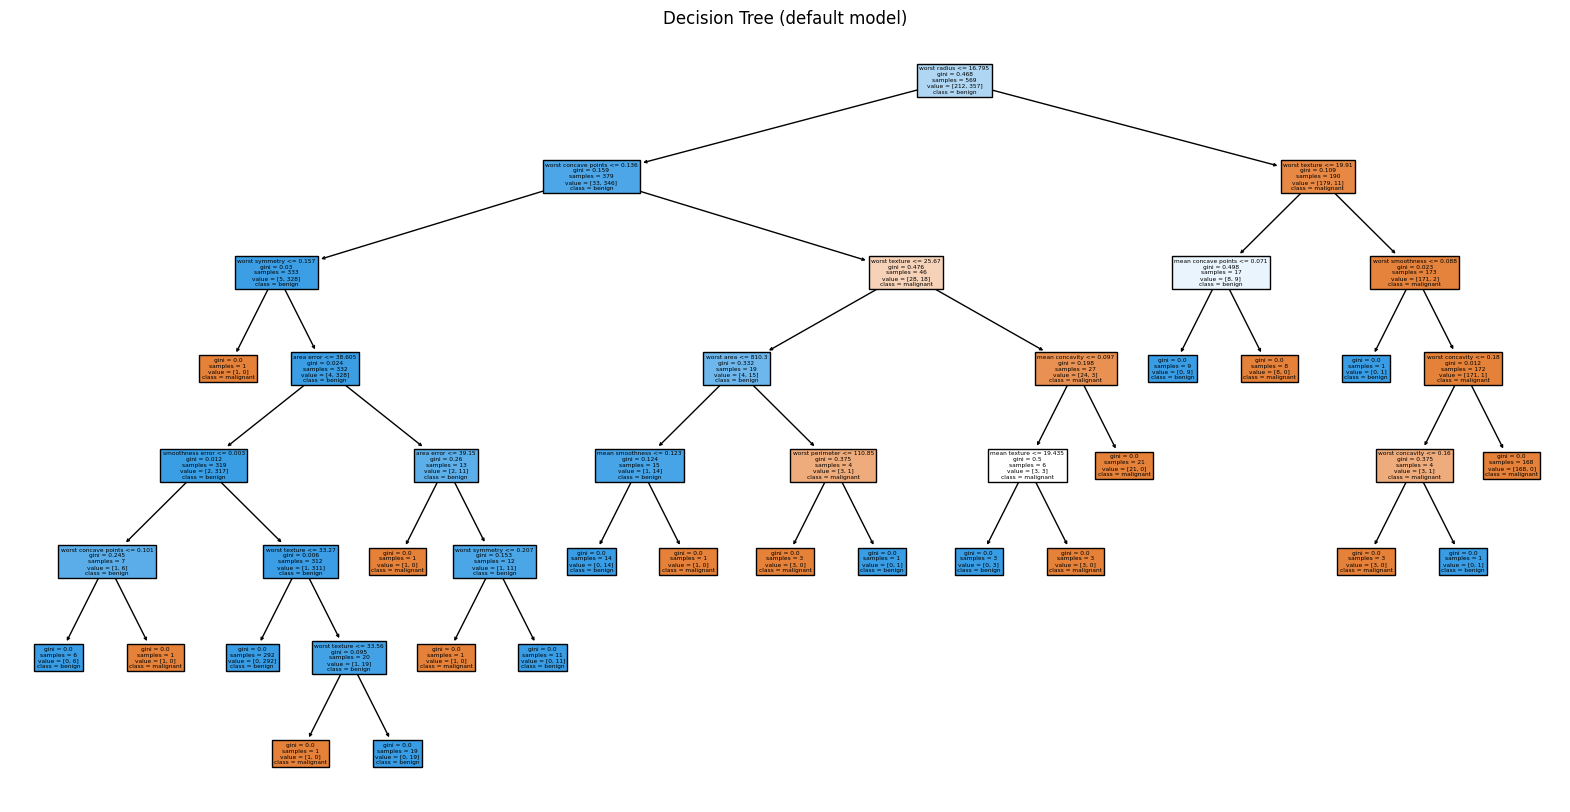

In [ ]:
clf.fit(X,y)
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree (default model)")
plt.show()

# **Simple Model**

Now we will simplify the model by decrease the depth of decision tree. We can reduce this value by use small number of **max_depth**. We used test different numbers and found 1 and 2 show intersection between curves.

In [ ]:
# Create a decision tree classifier
clf_var = DecisionTreeClassifier(max_depth=1)

In [ ]:
# Calculate the learning curve
train_sizes, train_scores, test_scores = learning_curve(
    clf_var, X, y, train_sizes=[0.1, 0.3, 0.5, 0.7, 0.9], cv=10, scoring=scorer, n_jobs=-1)

In [ ]:
# Calculate the mean and standard deviation of training scores and test scores
train_scores_mean = np.mean(train_scores, axis=1)
train_scores_std = np.std(train_scores, axis=1)
test_scores_mean = np.mean(test_scores, axis=1)
test_scores_std = np.std(test_scores, axis=1)

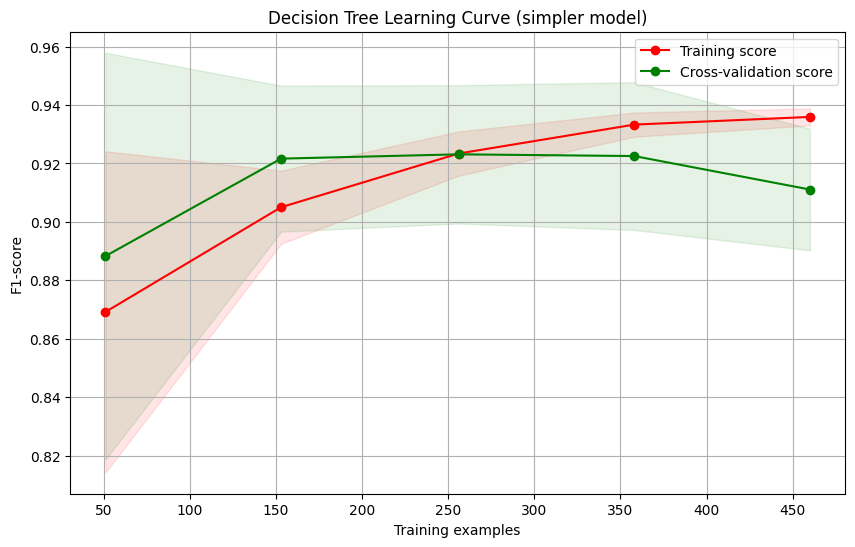

In [ ]:
# Plot the learning curve
plt.figure(figsize=(10, 6))
plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                 train_scores_mean + train_scores_std, alpha=0.1, color="r")
plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                 test_scores_mean + test_scores_std, alpha=0.1, color="g")
plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
         label="Training score")
plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
         label="Cross-validation score")
plt.xlabel("Training examples")
plt.ylabel("F1-score")
plt.title("Decision Tree Learning Curve (simpler model)")
plt.legend(loc="best")
plt.grid(True)
plt.show()

We can observe that the training and cross-validation curves intersect at a value of 0.92 F1-score. This indicates that the model is neither underfitting nor overfitting the data at that point. Additionally, the model is showing reliable results even with an increase in the size of the dataset.

## Visualize a decision trees (simpler model)

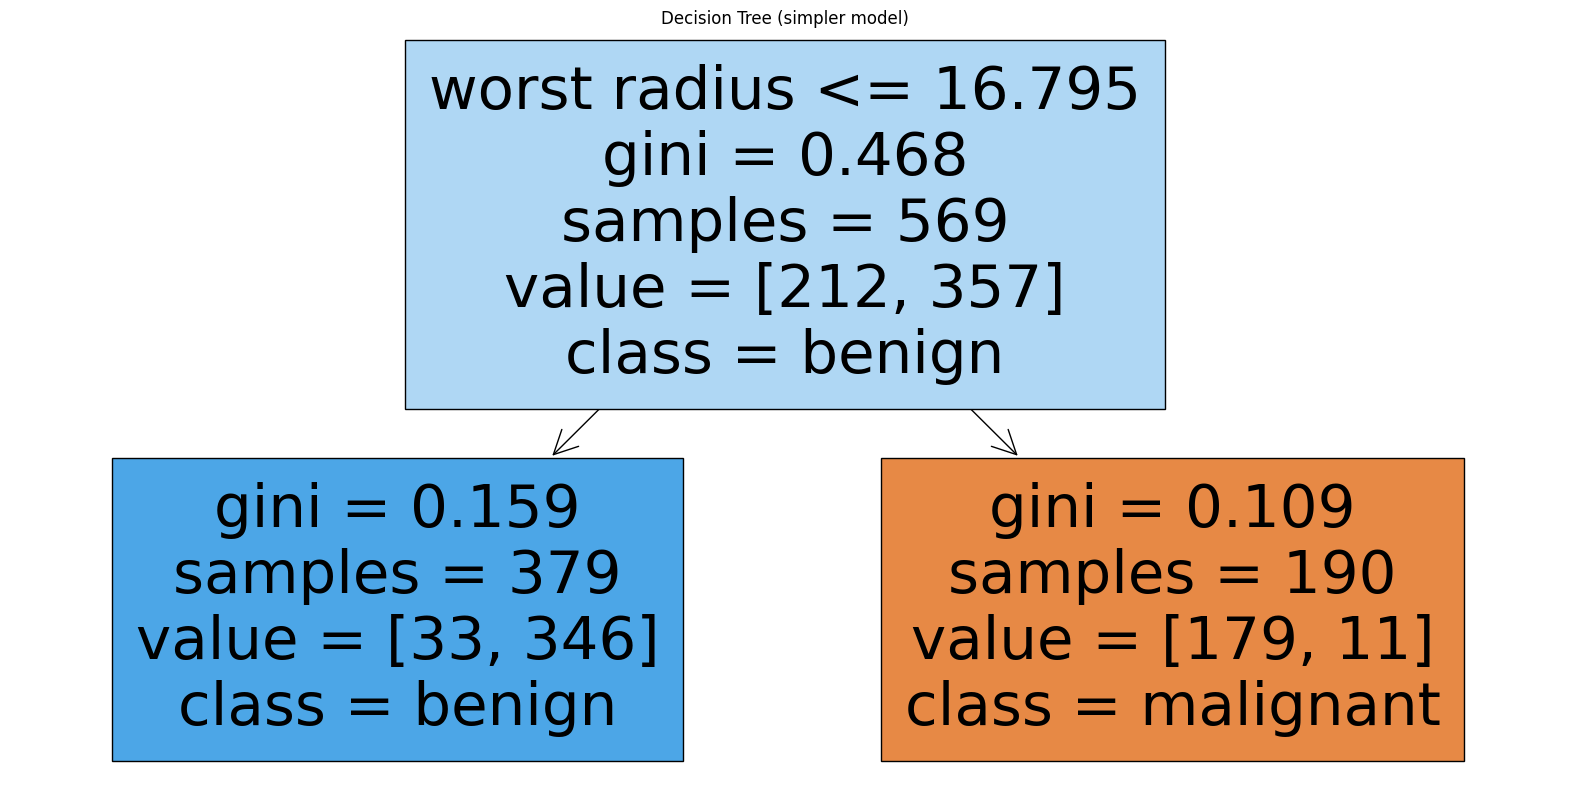

In [ ]:
clf_var.fit(X,y)
# Visualize the decision tree
plt.figure(figsize=(20,10))
plot_tree(clf_var, feature_names=data.feature_names, class_names=data.target_names, filled=True)
plt.title("Decision Tree (simpler model)")
plt.show()

## **Conclusion**

In this tutorial, we covered the topic of bias and variance in machine learning models and how to diagnose them using learning curves. By understanding how to identify and handle bias and variance issues, we can improve the performance of our models and build more reliable machine learning systems.

Copyright © 2024 Mohammed A. Shehab. All Rights Reserved.
